In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### J < 25.0

In [2]:
# apply J < 25 : in total 1773 quasars; apply J < 25 and Pq > 0.1: in total 1770 quasars
pqfile = pd.read_csv('res_Pq_pred_qso_J25.csv', index_col=False).replace([99.989998, 99.99], 26.2)
pqfile = pqfile[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'identity', 'index']]
pqTP = pqfile[pqfile['identity'] == 'q']
pqFP = pqfile[pqfile['identity'] != 'q']
pqFN = pd.read_csv('res_Pq_pred_qso_J25_fn.csv', index_col=False).replace([99.989998, 99.99], 26.2)
pqFN = pqFN[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'identity', 'index']]

In [3]:
pqFP['identity']

1763     s
1764     s
1765     s
1766     s
1767     s
        ..
12982    g
12983    g
12984    g
12985    g
12986    g
Name: identity, Length: 11224, dtype: object

In [4]:
pqFP.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,11224.000000,11224.000000,11224.000000,11224.000000,11224.000000,11224.000000
mean,27.973293,27.519566,25.366437,24.578511,24.507535,24.564222
std,3.642562,4.317088,0.372760,0.320695,0.317508,0.345609
min,26.200000,24.359013,22.696255,22.550955,22.652866,22.452839
25%,26.200000,26.768839,25.145897,24.369113,24.311155,24.345984
50%,27.968602,27.168653,25.419317,24.644000,24.547351,24.598430
75%,28.557346,27.682799,25.631695,24.844015,24.741329,24.811122
max,99.989998,99.989998,26.538342,24.999973,25.287575,25.467672


In [5]:
# apply J < 25: in total 1773 quasars
knnTP = pd.read_csv('z_pipeline_TP.csv', index_col=False).replace(99.99, 26.2)
knnTP = knnTP[knnTP['J_WFI_abmag'] < 25.0][['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag']]
knnFP = pd.read_csv('z_pipeline_FP.csv', index_col=False).replace(99.99, 26.2)
knnFP = knnFP[knnFP['J_WFI_abmag'] < 25.0][['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag']]
knnFN = pd.read_csv('z_pipeline_FN.csv', index_col=False).replace(99.99, 26.2)
knnFN = knnFN[knnFN['J_WFI_abmag'] < 25.0][['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag']]

In [6]:
print('With J < 25.0 and Pq > 0.1')
print('statistics on Pq TP:')
pqTP.describe()

With J < 25.0 and Pq > 0.1
statistics on Pq TP:


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,27.819641,27.152800,23.827629,23.484370,23.564898,23.490555
std,1.582548,1.484042,1.192546,1.113629,1.137360,1.145823
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,26.200000,26.200000,23.079874,22.781925,22.828188,22.764756
50%,27.881290,26.989890,24.066927,23.723868,23.806084,23.742387
75%,28.935617,28.005153,24.716703,24.383991,24.483596,24.414362
max,36.322512,35.547426,29.983065,24.999549,25.282303,25.356536


In [7]:
print('With J < 25.0 and weighted prob > 0.6')
print('statistics on knn TP:')
knnTP.describe()

With J < 25.0 and weighted prob > 0.6
statistics on knn TP:


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,27.810149,27.153143,23.794349,23.470032,23.554052,23.477957
std,1.587467,1.487185,1.171144,1.114929,1.139891,1.147345
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,26.200000,26.200000,23.054588,22.762964,22.821802,22.750790
50%,27.864848,26.989429,24.027590,23.703726,23.788317,23.727575
75%,28.938184,28.007244,24.679290,24.368418,24.480047,24.405422
max,36.322512,35.547426,29.983065,24.999549,25.282303,25.356536


In [8]:
print('With J < 25.0 and Pq > 0.1')
print('statistics on Pq FP:')
pqFP.describe()

With J < 25.0 and Pq > 0.1
statistics on Pq FP:


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,11224.000000,11224.000000,11224.000000,11224.000000,11224.000000,11224.000000
mean,27.973293,27.519566,25.366437,24.578511,24.507535,24.564222
std,3.642562,4.317088,0.372760,0.320695,0.317508,0.345609
min,26.200000,24.359013,22.696255,22.550955,22.652866,22.452839
25%,26.200000,26.768839,25.145897,24.369113,24.311155,24.345984
50%,27.968602,27.168653,25.419317,24.644000,24.547351,24.598430
75%,28.557346,27.682799,25.631695,24.844015,24.741329,24.811122
max,99.989998,99.989998,26.538342,24.999973,25.287575,25.467672


In [9]:
print('With J < 25.0 and weighted prob > 0.6')
print('statistics on knn FP:')
knnFP.describe()

With J < 25.0 and weighted prob > 0.6
statistics on knn FP:


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,29.270484,28.852454,25.262782,24.610613,24.628668,24.734184
std,2.209206,2.854124,0.355730,0.303432,0.326510,0.359796
min,26.272934,24.359013,22.696255,22.550955,22.652866,22.452839
25%,28.351807,28.009398,25.052065,24.418547,24.411278,24.492826
50%,28.982248,28.589882,25.304430,24.683044,24.666720,24.760252
75%,29.803850,29.306309,25.522831,24.849623,24.875050,25.005695
max,99.989998,99.989998,26.107653,24.999762,25.276674,25.440851


In [10]:
print('With J < 25.0 and Pq > 0.1')
print('statistics on Pq FN:')
pqFN.describe()

With J < 25.0 and Pq > 0.1
statistics on Pq FN:


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,29.585783,28.224135,25.415282,24.863183,24.889226,24.892032
std,1.874549,1.051659,0.185535,0.125940,0.173883,0.275985
min,28.241601,27.149529,25.074181,24.692591,24.630336,24.427531
25%,28.489232,27.584694,25.345542,24.772775,24.789903,24.727566
50%,28.636445,27.870500,25.478269,24.876155,24.934972,25.008865
75%,29.841345,28.671756,25.503518,24.967365,25.001633,25.064468
max,33.561282,30.036020,25.656402,24.993256,25.076203,25.223764


In [11]:
print('With J < 25.0 and weighted prob > 0.6')
print('statistics on knn FN:')
knnFN.describe()

With J < 25.0 and weighted prob > 0.6
statistics on knn FN:


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,28.564947,27.256585,25.495738,24.293335,24.214670,24.230578
std,1.329634,1.304435,1.039835,0.751546,0.825399,0.847523
min,26.200000,23.713558,21.864300,21.618986,21.569299,21.296802
25%,28.090282,26.200000,25.241436,24.180945,24.118078,24.101909
50%,28.379032,27.255421,25.408782,24.520928,24.443913,24.529624
75%,28.792251,27.810640,25.592096,24.730493,24.679454,24.725541
max,33.561282,30.233848,29.746760,24.982929,25.058306,25.102262


In [12]:
def precision(TP, FP, FN, val=25.0):
    return round(TP[TP['J_WFI_abmag']<val].shape[0]/(TP[TP['J_WFI_abmag']<val].shape[0]+FP[FP['J_WFI_abmag']<val].shape[0]), 4)


def recall(TP, FP, FN, val=25.0):
    return round(TP[TP['J_WFI_abmag']<val].shape[0]/(TP[TP['J_WFI_abmag']<val].shape[0]+FN[FN['J_WFI_abmag']<val].shape[0]), 4)

In [13]:
print('Precision score for Pq test:', precision(pqTP, pqFP, pqFN))
print('Precision score for KNN test:', precision(knnTP, knnFP, knnFN))
print()
print('Recall score for Pq test:', recall(pqTP, pqFP, pqFN))
print('Recall score for KNN test:', recall(knnTP, knnFP, knnFN))

Precision score for Pq test: 0.1358
Precision score for KNN test: 0.5327

Recall score for Pq test: 0.996
Recall score for KNN test: 0.978


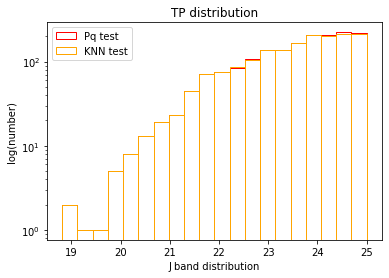

In [14]:
plt.hist(pqTP['J_WFI_abmag'], bins=20, fill=False, edgecolor='red', label='Pq test')
plt.hist(knnTP['J_WFI_abmag'], bins=20, fill=False, edgecolor='orange', label='KNN test')

plt.xlabel('J band distribution')
plt.ylabel('log(number)')
plt.yscale('log')
plt.title('TP distribution')
plt.legend()
plt.show()

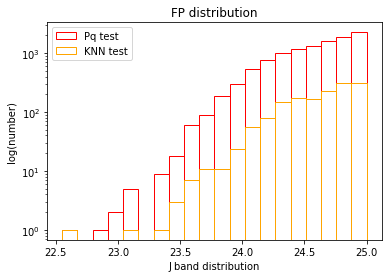

In [15]:
plt.hist(pqFP['J_WFI_abmag'], bins=20, fill=False, edgecolor='red', label='Pq test')
plt.hist(knnFP['J_WFI_abmag'], bins=20, fill=False, edgecolor='orange', label='KNN test')

plt.xlabel('J band distribution')
plt.ylabel('log(number)')
plt.yscale('log')
plt.title('FP distribution')
plt.legend()
plt.show()

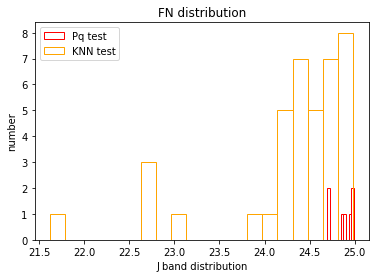

In [16]:
plt.hist(pqFN['J_WFI_abmag'], fill=False, edgecolor='red', label='Pq test')
plt.hist(knnFN['J_WFI_abmag'], bins=20, fill=False, edgecolor='orange', label='KNN test')

plt.xlabel('J band distribution')
plt.ylabel('number')
plt.title('FN distribution')
plt.legend()
plt.show()

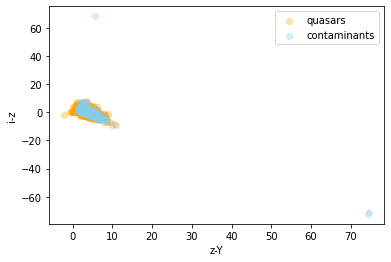

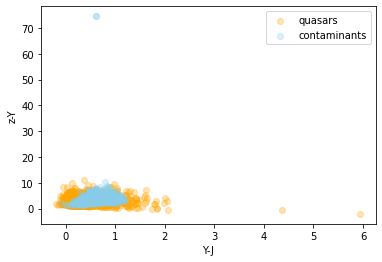

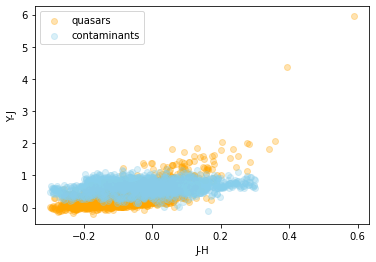

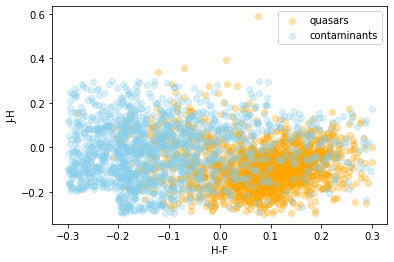

In [17]:
# i-z vs z-Y
plt.scatter(knnTP['z_LSST_abmag']-knnTP['Y_WFI_abmag'], knnTP['i_LSST_abmag']-knnTP['z_LSST_abmag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(knnFP['z_LSST_abmag']-knnFP['Y_WFI_abmag'], knnFP['i_LSST_abmag']-knnFP['z_LSST_abmag'], alpha=0.3,label='contaminants', color='skyblue')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(knnTP['Y_WFI_abmag']-knnTP['J_WFI_abmag'], knnTP['z_LSST_abmag']-knnTP['Y_WFI_abmag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(knnFP['Y_WFI_abmag']-knnFP['J_WFI_abmag'], knnFP['z_LSST_abmag']-knnFP['Y_WFI_abmag'], alpha=0.3,label='contaminants', color='skyblue')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(knnTP['J_WFI_abmag']-knnTP['H_WFI_abmag'], knnTP['Y_WFI_abmag']-knnTP['J_WFI_abmag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(knnFP['J_WFI_abmag']-knnFP['H_WFI_abmag'], knnFP['Y_WFI_abmag']-knnFP['J_WFI_abmag'], alpha=0.3,label='contaminants', color='skyblue')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(knnTP['H_WFI_abmag']-knnTP['F_WFI_abmag'], knnTP['J_WFI_abmag']-knnTP['H_WFI_abmag'], alpha=0.3, label='quasars', color='orange')
plt.scatter(knnFP['H_WFI_abmag']-knnFP['F_WFI_abmag'], knnFP['J_WFI_abmag']-knnFP['H_WFI_abmag'], alpha=0.3, label='contaminants', color='skyblue')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.legend()
plt.show()

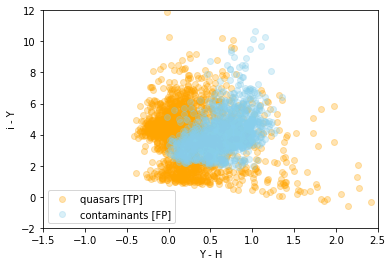

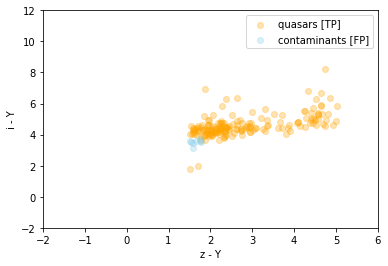

In [18]:
# x: Y - H
# y: i - Y
plt.scatter(knnTP['Y_WFI_abmag']-knnTP['H_WFI_abmag'], knnTP['i_LSST_abmag']-knnTP['Y_WFI_abmag'], alpha=0.3, label='quasars [TP]', color='orange')
plt.scatter(knnFP['Y_WFI_abmag']-knnFP['H_WFI_abmag'], knnFP['i_LSST_abmag']-knnFP['Y_WFI_abmag'], alpha=0.3,label='contaminants [FP]', color='skyblue')
plt.xlabel('Y - H')
plt.ylabel('i - Y')
plt.ylim(-2, 12)
plt.xlim(-1.5, 2.5)
plt.legend()
plt.show()

# x: z - Y
# y: i - Y
plt.scatter(knnTP[(knnTP['z_LSST_abmag'] > 24.0)&(knnTP['z_LSST_abmag'] < 26.0)]['z_LSST_abmag']-knnTP[(knnTP['z_LSST_abmag'] > 24.0)&(knnTP['z_LSST_abmag'] < 26.0)]['Y_WFI_abmag'], knnTP[(knnTP['z_LSST_abmag'] > 24.0)&(knnTP['z_LSST_abmag'] < 26.0)]['i_LSST_abmag']-knnTP[(knnTP['z_LSST_abmag'] > 24.0)&(knnTP['z_LSST_abmag'] < 26.0)]['Y_WFI_abmag'], alpha=0.3, label='quasars [TP]', color='orange')
plt.scatter(knnFP[(knnFP['z_LSST_abmag'] > 24.0)&(knnFP['z_LSST_abmag'] < 26.0)]['z_LSST_abmag']-knnFP[(knnFP['z_LSST_abmag'] > 24.0)&(knnFP['z_LSST_abmag'] < 26.0)]['Y_WFI_abmag'], knnFP[(knnFP['z_LSST_abmag'] > 24.0)&(knnFP['z_LSST_abmag'] < 26.0)]['i_LSST_abmag']-knnFP[(knnFP['z_LSST_abmag'] > 24.0)&(knnFP['z_LSST_abmag'] < 26.0)]['Y_WFI_abmag'], alpha=0.3,label='contaminants [FP]', color='skyblue')
plt.xlabel('z - Y')
plt.ylabel('i - Y')
plt.ylim(-2, 12)
plt.xlim(-2, 6)
plt.legend()
plt.show()

### color plot comparison

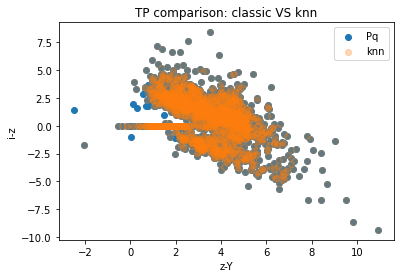

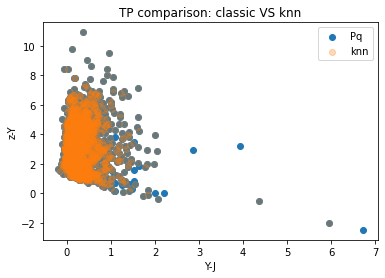

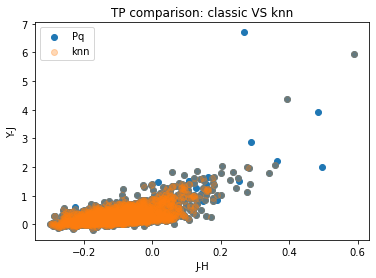

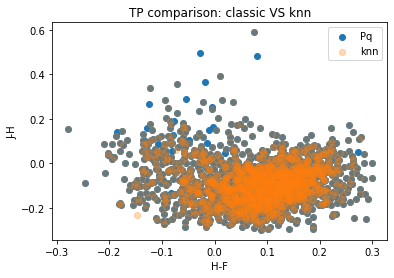

In [25]:
# i-z vs z-Y
plt.scatter(pqTP['z_LSST_abmag']-pqTP['Y_WFI_abmag'], pqTP['i_LSST_abmag']-pqTP['z_LSST_abmag'], label='Pq')
plt.scatter(knnTP['z_LSST_abmag']-knnTP['Y_WFI_abmag'], knnTP['i_LSST_abmag']-knnTP['z_LSST_abmag'], alpha=0.3, label='knn')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.title('TP comparison: classic VS knn')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(pqTP['Y_WFI_abmag']-pqTP['J_WFI_abmag'], pqTP['z_LSST_abmag']-pqTP['Y_WFI_abmag'], label='Pq')
plt.scatter(knnTP['Y_WFI_abmag']-knnTP['J_WFI_abmag'], knnTP['z_LSST_abmag']-knnTP['Y_WFI_abmag'], alpha=0.3, label='knn')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.title('TP comparison: classic VS knn')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(pqTP['J_WFI_abmag']-pqTP['H_WFI_abmag'], pqTP['Y_WFI_abmag']-pqTP['J_WFI_abmag'], label='Pq')
plt.scatter(knnTP['J_WFI_abmag']-knnTP['H_WFI_abmag'], knnTP['Y_WFI_abmag']-knnTP['J_WFI_abmag'], alpha=0.3, label='knn')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.title('TP comparison: classic VS knn')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(pqTP['H_WFI_abmag']-pqTP['F_WFI_abmag'], pqTP['J_WFI_abmag']-pqTP['H_WFI_abmag'], label='Pq')
plt.scatter(knnTP['H_WFI_abmag']-knnTP['F_WFI_abmag'], knnTP['J_WFI_abmag']-knnTP['H_WFI_abmag'], alpha=0.3, label='knn')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.title('TP comparison: classic VS knn')
plt.legend()
plt.show()

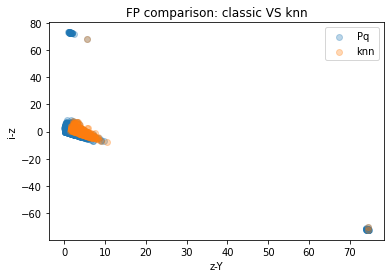

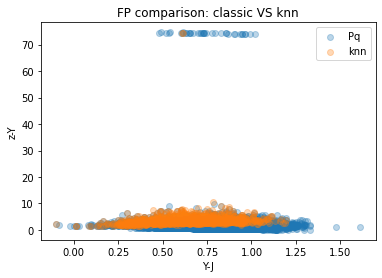

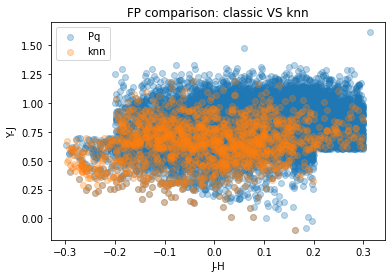

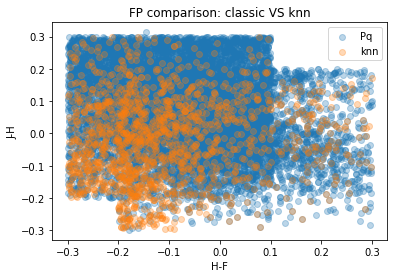

In [20]:
# i-z vs z-Y
plt.scatter(pqFP['z_LSST_abmag']-pqFP['Y_WFI_abmag'], pqFP['i_LSST_abmag']-pqFP['z_LSST_abmag'], alpha=0.3,label='Pq')
plt.scatter(knnFP['z_LSST_abmag']-knnFP['Y_WFI_abmag'], knnFP['i_LSST_abmag']-knnFP['z_LSST_abmag'], alpha=0.3, label='knn')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.title('FP comparison: classic VS knn')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(pqFP['Y_WFI_abmag']-pqFP['J_WFI_abmag'], pqFP['z_LSST_abmag']-pqFP['Y_WFI_abmag'], alpha=0.3,label='Pq')
plt.scatter(knnFP['Y_WFI_abmag']-knnFP['J_WFI_abmag'], knnFP['z_LSST_abmag']-knnFP['Y_WFI_abmag'], alpha=0.3, label='knn')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.title('FP comparison: classic VS knn')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(pqFP['J_WFI_abmag']-pqFP['H_WFI_abmag'], pqFP['Y_WFI_abmag']-pqFP['J_WFI_abmag'], alpha=0.3,label='Pq')
plt.scatter(knnFP['J_WFI_abmag']-knnFP['H_WFI_abmag'], knnFP['Y_WFI_abmag']-knnFP['J_WFI_abmag'], alpha=0.3, label='knn')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.title('FP comparison: classic VS knn')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(pqFP['H_WFI_abmag']-pqFP['F_WFI_abmag'], pqFP['J_WFI_abmag']-pqFP['H_WFI_abmag'], alpha=0.3, label='Pq')
plt.scatter(knnFP['H_WFI_abmag']-knnFP['F_WFI_abmag'], knnFP['J_WFI_abmag']-knnFP['H_WFI_abmag'], alpha=0.3, label='knn')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.title('FP comparison: classic VS knn')
plt.legend()
plt.show()

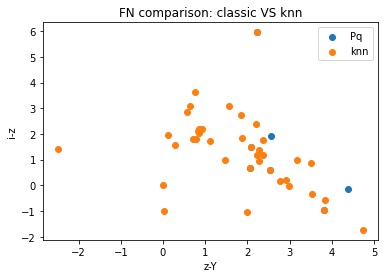

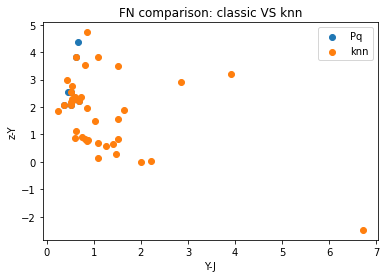

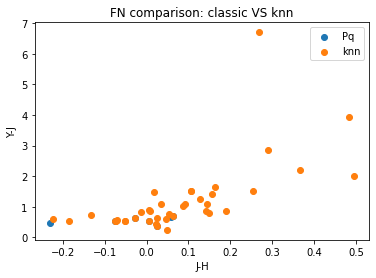

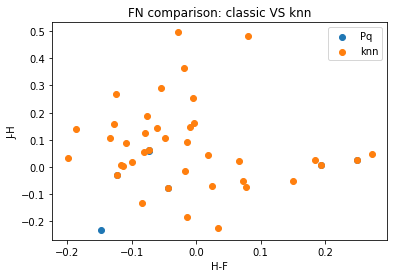

In [22]:
# i-z vs z-Y
plt.scatter(pqFN['z_LSST_abmag']-pqFN['Y_WFI_abmag'], pqFN['i_LSST_abmag']-pqFN['z_LSST_abmag'], label='Pq')
plt.scatter(knnFN['z_LSST_abmag']-knnFN['Y_WFI_abmag'], knnFN['i_LSST_abmag']-knnFN['z_LSST_abmag'], label='knn')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.title('FN comparison: classic VS knn')
plt.legend()
plt.show()

# z-Y vs Y-J
plt.scatter(pqFN['Y_WFI_abmag']-pqFN['J_WFI_abmag'], pqFN['z_LSST_abmag']-pqFN['Y_WFI_abmag'], label='Pq')
plt.scatter(knnFN['Y_WFI_abmag']-knnFN['J_WFI_abmag'], knnFN['z_LSST_abmag']-knnFN['Y_WFI_abmag'], label='knn')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.title('FN comparison: classic VS knn')
plt.legend()
plt.show()

# Y-J vs J-H
plt.scatter(pqFN['J_WFI_abmag']-pqFN['H_WFI_abmag'], pqFN['Y_WFI_abmag']-pqFN['J_WFI_abmag'], label='Pq')
plt.scatter(knnFN['J_WFI_abmag']-knnFN['H_WFI_abmag'], knnFN['Y_WFI_abmag']-knnFN['J_WFI_abmag'], label='knn')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.title('FN comparison: classic VS knn')
plt.legend()
plt.show()

# J-H vs H-F
plt.scatter(pqFN['H_WFI_abmag']-pqFN['F_WFI_abmag'], pqFN['J_WFI_abmag']-pqFN['H_WFI_abmag'], label='Pq')
plt.scatter(knnFN['H_WFI_abmag']-knnFN['F_WFI_abmag'], knnFN['J_WFI_abmag']-knnFN['H_WFI_abmag'], label='knn')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.title('FN comparison: classic VS knn')
plt.legend()
plt.show()

## J < 24.5